In [2]:
import numpy as np
import matplotlib.pyplot as plt


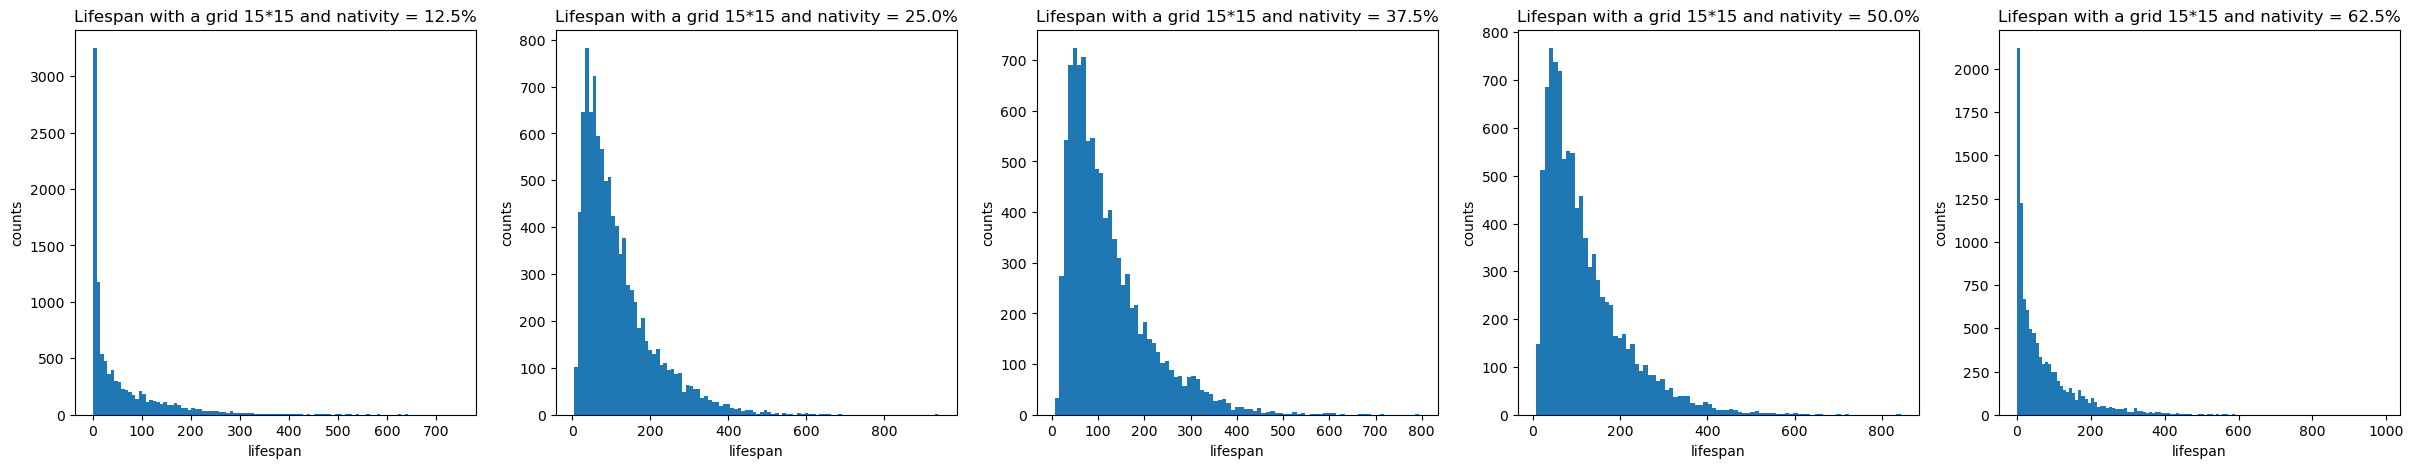

In [3]:
# CODE TO ANALIZE THE LIFESPAN CHANGING SEED (FOR FIXED DIMENSION AND NATIVITY)
occupazioni = ['125', '250', '375', '500', '625']
dimensioni = ['15']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

analisi = 'lifespan'
i = 0
print()
for occ in occupazioni:
    for griglia in dimensioni:
        data = []
        filename = "vite/" + analisi + "_" + griglia + "_" + occ + ".txt"
        filein = open(filename, 'r')
        for line in filein:
            data.append(float(line))
        
        title = "Lifespan with a grid " + griglia + "*" + griglia + " and nativity = " + str(int(occ)/10) + "%"
        ax = axes[i]
        ax.hist(data, bins='auto')
        ax.set_xlabel("lifespan")
        ax.set_ylabel("counts")
        ax.title.set_text(title)
        i += 1
    
plt.savefig("lifespan.png")


In [ ]:
analisi = 'periodicity'

for occ in occupazioni:
    for griglia in dimensioni:
        data = []
        filename = "vite/" + analisi + "_" + griglia + "_" + occ + ".txt"
        filein = open(filename, 'r')
        for line in filein:
            data.append(float(line))

# DA MODIFICAREEEE
        title = "Periods with a grid " + griglia + "*" + griglia + " and nativity = " + str(int(occ)/10) + "%"
        ax = axes[i]
        ax.hist(data, bins='auto')
        ax.set_xlabel("lifespan")
        ax.set_ylabel("counts")
        ax.title.set_text(title)
        i += 1
    
plt.savefig("lifespan.png")


In [4]:
filename = "nativities/mean_evaluated.txt"
filein = open(filename, 'r')

dati_x, dati_y = [], []
for line in filein:
    dati_x.append(float(line.split("\t")[0]))
    dati_y.append(float(line.split("\t")[1]))

print(dati_x, dati_y)

plt.plot(dati_x, dati_y, "o")

FileNotFoundError: [Errno 2] No such file or directory: 'nativities/mean_evaluated.txt'